In [1]:
# Importing necessary libraries...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(16468, 14)

In [4]:
# Checking the various columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# Checking the data types of columns
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [6]:
# From below, it is clear that 1517 rows have non-null values and rest of the rows have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [7]:
#From below it is clear that the dataset contains 14951 rows with NaN values. These needs to be deleted.
#As these rows are of no use to us in data analysis.
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
# Dropping all the 14951 rows which have NaN values in them.
df = df.dropna(how = 'all')

In [9]:
# 14951 rows with NaN values have been removed. Now we have 1517 rows and 14 columns.
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

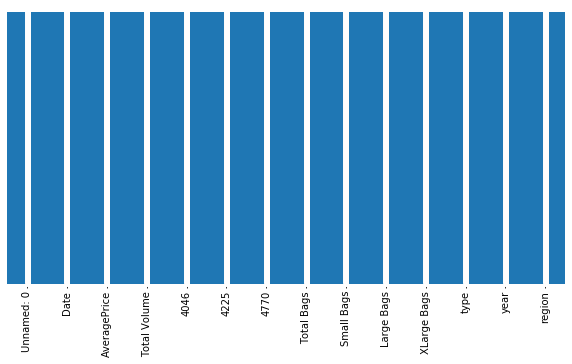

In [11]:
# Visualizing the null values with the help of heat map. From the below visualization we can see that there are not any NaN values present.
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab10',annot=True)

# Checking correlation

In [12]:
df_cor=df.corr()
df_cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


Here we can see the correlation between the columns.
For better understanding we can see it via visualization(with the help of heatmap).

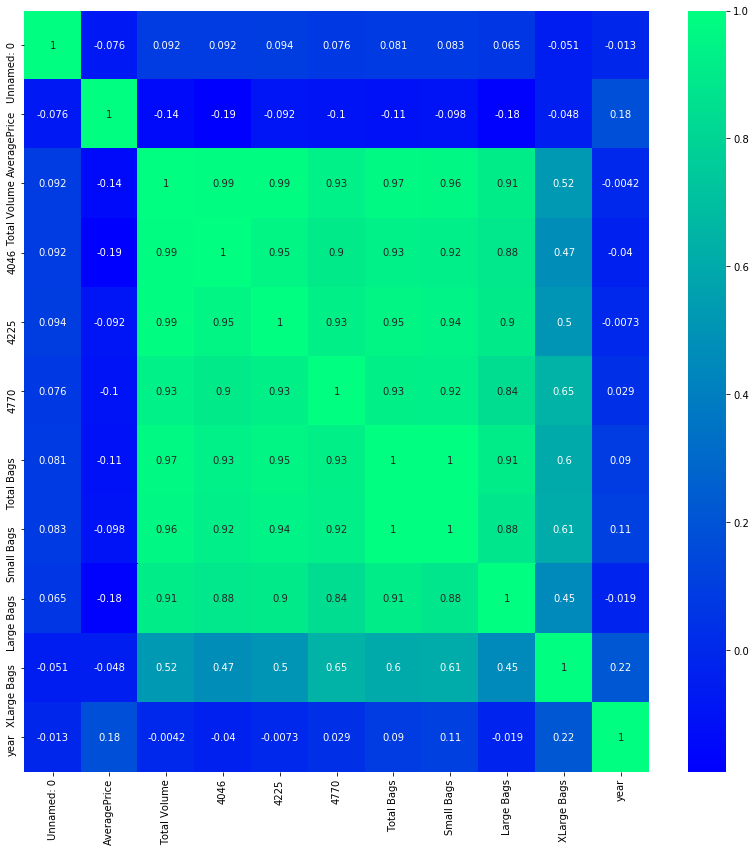

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(df_cor,annot=True,cmap='winter')

# Summary Statistics

In [14]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [15]:
# Dropping the irrelevant column 'Unnamed: 0', 'Small Bags', 'Large Bags' and 'XLarge Bags'
df.drop(['Unnamed: 0', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1, inplace=True)

In [16]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,conventional,2016.0,Charlotte


# Data Visualization

In [17]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

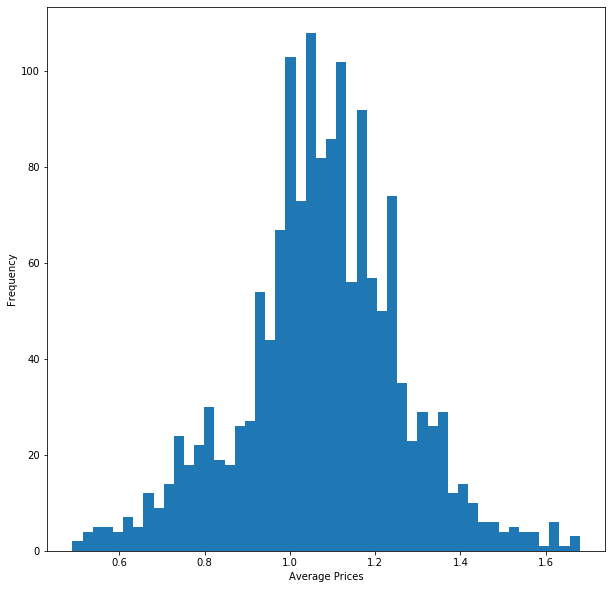

In [18]:
df.AveragePrice.plot(kind = 'hist',bins = 50,figsize = (10,10))
plt.xlabel("Average Prices")
plt.ylabel("Frequency")
plt.show()
# From below graph, it can be interpreted that the average price is normally distributed.

In [19]:
df['Date'].unique()

array(['27-12-2015', '20-12-2015', '13-12-2015', '06-12-2015',
       '29-11-2015', '22-11-2015', '15-11-2015', '08-11-2015',
       '01-11-2015', '25-10-2015', '18-10-2015', '11-10-2015',
       '04-10-2015', '27-09-2015', '20-09-2015', '13-09-2015',
       '06-09-2015', '30-08-2015', '23-08-2015', '16-08-2015',
       '09-08-2015', '02-08-2015', '26-07-2015', '19-07-2015',
       '12-07-2015', '05-07-2015', '28-06-2015', '21-06-2015',
       '14-06-2015', '07-06-2015', '31-05-2015', '24-05-2015',
       '17-05-2015', '10-05-2015', '03-05-2015', '26-04-2015',
       '19-04-2015', '12-04-2015', '05-04-2015', '29-03-2015',
       '22-03-2015', '15-03-2015', '08-03-2015', '01-03-2015',
       '22-02-2015', '15-02-2015', '08-02-2015', '01-02-2015',
       '25-01-2015', '18-01-2015', '11-01-2015', '04-01-2015',
       '25-12-2016', '18-12-2016', '11-12-2016', '04-12-2016',
       '27-11-2016', '20-11-2016', '13-11-2016', '06-11-2016',
       '30-10-2016', '23-10-2016', '16-10-2016', '09-10

In [20]:
df_2015=df[df.year==2015]
df_2016=df[df.year==2016]

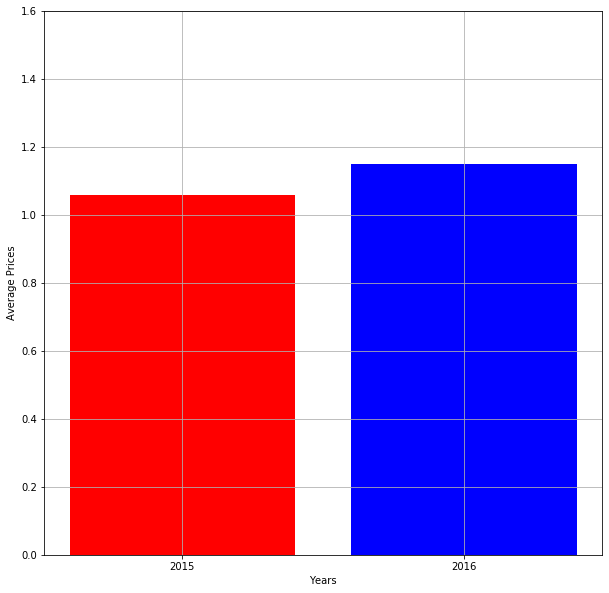

In [21]:
plt.figure(figsize=(10,10))
plt.bar("2015",df_2015.AveragePrice.mean(),color="red")
plt.bar("2016",df_2016.AveragePrice.mean(),color="blue")
plt.ylim(0,1.6)
plt.xlabel("Years")
plt.ylabel("Average Prices")
plt.grid()
plt.show()
# From below graph, it is clear that the AveragePrice has risen slightly from the year 2015 to 2016.

In [22]:
df['type'].unique()

array(['conventional'], dtype=object)

# Plotting Outliers

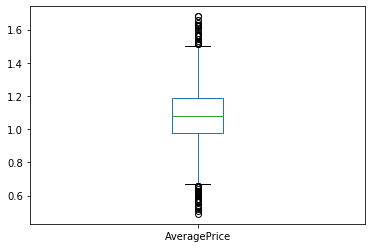

In [23]:
df['AveragePrice'].plot.box()

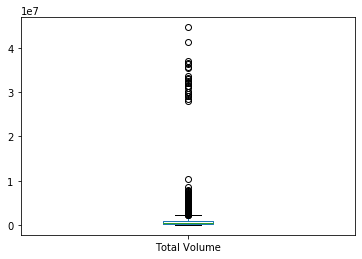

In [24]:
df['Total Volume'].plot.box()

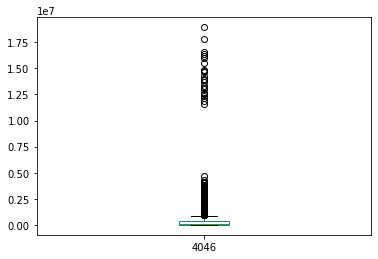

In [25]:
df['4046'].plot.box()

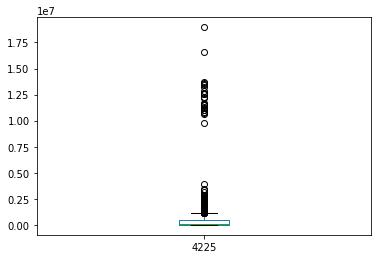

In [26]:
df['4225'].plot.box()

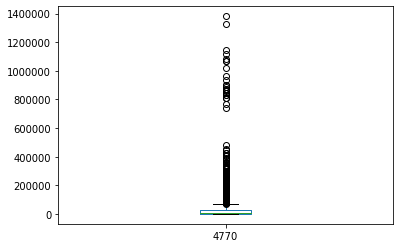

In [27]:
df['4770'].plot.box()

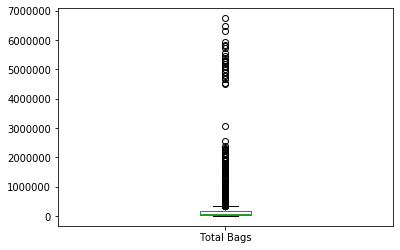

In [28]:
df['Total Bags'].plot.box()

Observation: Extreme outliers are present in the dataset as shown in boxplot.

In [29]:
# Checking skewness of data
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
year            1.828332
dtype: float64

In [30]:
# Dropping 'Date', 'type'(as there is only 'conventional type' option in the dataset) and 'year' in dataset.
df.drop(['Date', 'type', 'year'], axis=1, inplace=True)

In [31]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,Albany
...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,Charlotte


In [32]:
# Converting categorical column 'region' into numerical column using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [33]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0
...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,7


In [34]:
#Treating skewness via log method

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [35]:
# Checking again the skewness of the dataset.
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
region          0.288146
dtype: float64

# Removing Outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.35048079, 1.35676174, 1.82816171, ..., 1.81061284, 1.6847247 ,
        1.3143384 ],
       [1.45639674, 1.46638736, 2.01206913, ..., 1.73759363, 1.62012346,
        1.3143384 ],
       [0.76783831, 0.9321394 , 1.94183376, ..., 1.42852642, 1.73232564,
        1.3143384 ],
       ...,
       [2.14485045, 0.64565294, 0.20190426, ..., 0.4534771 , 0.25269255,
        0.88028586],
       [2.09189247, 0.60503087, 0.13577946, ..., 0.4706876 , 0.23525501,
        0.88028586],
       [1.88006056, 0.62805557, 0.23299293, ..., 0.44944229, 0.17871961,
        0.88028586]])

In [37]:
threshold=3
print(np.where(z>3))

(array([ 760, 1182, 1182, 1183, 1183, 1184, 1184, 1185, 1185, 1186, 1186,
       1188, 1188, 1189, 1189, 1191, 1202, 1346, 1411, 1457, 1458],
      dtype=int64), array([0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 5, 1, 4, 0, 0, 0],
      dtype=int64))


In [38]:
df_new=df[(z<3).all(axis=1)]

In [39]:
print(df.shape, '\t',df_new.shape)

(1517, 7) 	 (1503, 7)


# Model Training

In [40]:
# Separating into input and output variables
df_x=df.drop(columns=['AveragePrice'])

In [41]:
y=pd.DataFrame(df['AveragePrice'])

In [42]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [43]:
# Check again the skewness
x.skew()

Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
region          0.288146
dtype: float64

In [44]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [45]:
print(x_train.shape, '\t',x_test.shape)

(1213, 6) 	 (304, 6)


In [46]:
# Importing our Models Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
# Using algorithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

# From below, we can observe that KNeighborsRegressor is giving the best r2_score of 0.82

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.34744701535071243
Error:
Mean absolute error: 0.11313909319528968
Mean squared error: 0.021835740463282453
Root Mean Squared Error: 0.1477692135164915
r2_score: 0.377770362586199
**************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error:
Mean absolute error: 0.07529605263157894
Mean squared error: 0.012020723684210527
Root Mean Squared Error: 0.10963906094184922
r2_score: 0.6574583512725343
********************************************

In [48]:
# Cross validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m,'is:')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Score: [ 0.04541979 -0.02868892  0.37151254  0.19366238]
Mean Score: 0.14547644945676286
Standard deviation: 0.15310054620533417
*************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
Score: [-3.22850156 -2.15037553  0.2571489   0.06381105]
Mean Score: -1.2644792849106106
Standard deviation: 1.476643423833437
*************************************************************************************************


Score of KNeighborsRegressor(algorith

In [49]:
# Ridge model is giving best result so finding its best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [50]:
# Using Ridge model with best results

ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.34733717078739035


Mean absolute error: 0.11326431042773193
Mean squared error: 0.021877185376425145
Root Mean Squared Error: 0.14790938231371648


r2_score: 0.37658935142146255


In [51]:
# Cross validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard deviation:',score.std())

Score: [ 0.06324111 -0.01530823  0.36659293  0.19363455]
Mean Score: 0.1520400919963508
Standard deviation: 0.14461478178176077


# Using Ensemble technique to boost up our score

In [52]:
#Using Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=42)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score',r2_score(y_test,predrf))

Score: 0.9674920176017981


Mean absolute error: 0.05774506578947367
Mean squared error: 0.00648867351973684
Root Mean Squared Error: 0.0805523030070329


r2_score 0.8150992416185067


In [53]:
# Using Ada Boost
from sklearn.ensemble import AdaBoostRegressor
ridge=Ridge()

adb=AdaBoostRegressor(base_estimator=ridge,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.3442048235742877


Mean absolute error: 0.11385876442990257
Mean squared error: 0.021976921437825734
Root mean squared error: 0.14824615151101136


r2_score: 0.3737472800281556


RandomForest is working well because it gives the best r2_score of 96% and also it is also it is not suffering from overfitting or underfitting. So we save RandomForest Regressor as our final Model.

In [54]:
#Saving the RandomForest Regressor as our final model
from sklearn.externals import joblib
joblib.dump(rf,'avocado_linear_regression.obj')

['avocado_linear_regression.obj']

In [73]:
# Loading the model
rf_from_joblib=joblib.load('avocado_linear_regression.obj')

# using the loaded model to make predictions

rf_from_joblib.predict(x_test)

array([0.9995, 1.0065, 1.0065, 0.9995, 0.9995, 0.978 , 0.994 , 0.9995,
       1.0065, 0.9995, 0.994 , 0.9995, 0.9995, 0.994 , 0.9995, 0.9995,
       0.9995, 1.0065, 1.0065, 1.0065, 0.9995, 0.994 , 0.9995, 0.9995,
       0.9995, 0.9995, 0.994 , 0.9995, 0.9995, 0.9995, 1.0065, 0.9995,
       0.9995, 1.0065, 0.994 , 0.9995, 1.0065, 1.0065, 0.994 , 0.9995,
       1.0065, 0.9995, 0.9995, 0.9995, 0.982 , 1.0065, 1.0065, 0.9995,
       1.0065, 1.0065, 1.0065, 0.9995, 0.994 , 0.9915, 0.9995, 0.9995,
       0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 1.0065,
       1.0065, 0.994 , 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 1.0065,
       0.994 , 1.0065, 1.0065, 0.9995, 1.0065, 1.0065, 1.0065, 0.994 ,
       0.9995, 0.978 , 1.0065, 0.978 , 0.9995, 0.9995, 0.994 , 1.0065,
       0.994 , 1.0065, 0.9995, 1.0065, 0.994 , 0.9995, 1.0065, 0.9995,
       0.9995, 0.978 , 0.994 , 0.9995, 0.994 , 0.994 , 1.0065, 0.9995,
       0.9995, 0.9995, 0.982 , 0.9995, 0.994 , 0.994 , 0.994 , 0.9995,
      

# Classification- Where target variable is 'region'

In [55]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,0
...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,7


In [56]:
# Separating into input and output variables
x=df.drop(columns=['region'])

In [57]:
y=pd.DataFrame(df['region'])

In [58]:
array = df.values
x = array[:,0:-1].astype(float)
y = array[:,-1]
validation_size = 0.2
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [59]:
print(x_train.shape, '\t',x_test.shape)

(1213, 6) 	 (304, 6)


In [60]:
print(y_train.shape,'\t',y_test.shape)

(1213,) 	 (304,)


In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.2730263157894737
[[13  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.50      0.68      0.58        19
         1.0       0.19      1.00      0.33         7
         2.0       0.68      1.00      0.81        15
         3.0       0.42      0.91      0.57        11
         4.0       0.10      0.44      0.16         9
         5.0       0.62      0.62      0.62         8
         6.0       0.17      1.00      0.29        23
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00        11
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00         6
        14.0  

In [62]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5493421052631579
[[15  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        19
         1.0       0.78      1.00      0.88         7
         2.0       0.56      1.00      0.71        15
         3.0       0.90      0.82      0.86        11
         4.0       0.42      0.89      0.57         9
         5.0       0.86      0.75      0.80         8
         6.0       0.49      1.00      0.66        23
         7.0       0.33      1.00      0.50         1
         8.0       0.00      0.00      0.00         2
         9.0       0.48      1.00      0.65        11
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         3
        12.0       0.80      1.00      0.89        12
        13.0       0.00      0.00      0.00         6
        14.0  

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8585526315789473
[[17  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.70      1.00      0.82         7
         2.0       1.00      0.87      0.93        15
         3.0       1.00      1.00      1.00        11
         4.0       0.89      0.89      0.89         9
         5.0       1.00      0.88      0.93         8
         6.0       0.92      1.00      0.96        23
         7.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00        11
        10.0       0.50      0.50      0.50         2
        11.0       0.67      0.67      0.67         3
        12.0       0.92      0.92      0.92        12
        13.0       1.00      0.83      0.91         6
        14.0  

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8585526315789473
[[17  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.70      1.00      0.82         7
         2.0       1.00      0.87      0.93        15
         3.0       1.00      1.00      1.00        11
         4.0       0.89      0.89      0.89         9
         5.0       1.00      0.88      0.93         8
         6.0       0.92      1.00      0.96        23
         7.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00        11
        10.0       0.50      0.50      0.50         2
        11.0       0.67      0.67      0.67         3
        12.0       0.92      0.92      0.92        12
        13.0       1.00      0.83      0.91         6
        14.0  

In [65]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8980263157894737
[[15  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.58      1.00      0.74         7
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00        11
         4.0       0.90      1.00      0.95         9
         5.0       1.00      0.88      0.93         8
         6.0       0.95      0.87      0.91        23
         7.0       0.50      1.00      0.67         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00        11
        10.0       0.67      1.00      0.80         2
        11.0       1.00      1.00      1.00         3
        12.0       0.92      1.00      0.96        12
        13.0       1.00      1.00      1.00         6
        14.0  

In [66]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [67]:
svmkernel('rbf')

0.5493421052631579
[[15  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        19
         1.0       0.78      1.00      0.88         7
         2.0       0.56      1.00      0.71        15
         3.0       0.90      0.82      0.86        11
         4.0       0.42      0.89      0.57         9
         5.0       0.86      0.75      0.80         8
         6.0       0.49      1.00      0.66        23
         7.0       0.33      1.00      0.50         1
         8.0       0.00      0.00      0.00         2
         9.0       0.48      1.00      0.65        11
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         3
        12.0       0.80      1.00      0.89        12
        13.0       0.00      0.00      0.00         6
        14.0  

In [68]:
svmkernel('poly')

0.8980263157894737
[[15  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.58      1.00      0.74         7
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00        11
         4.0       0.90      1.00      0.95         9
         5.0       1.00      0.88      0.93         8
         6.0       0.95      0.87      0.91        23
         7.0       0.50      1.00      0.67         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00        11
        10.0       0.67      1.00      0.80         2
        11.0       1.00      1.00      1.00         3
        12.0       0.92      1.00      0.96        12
        13.0       1.00      1.00      1.00         6
        14.0  

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9243421052631579
[[18  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.88      1.00      0.93         7
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00        11
         4.0       1.00      0.89      0.94         9
         5.0       1.00      0.88      0.93         8
         6.0       1.00      0.96      0.98        23
         7.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00        11
        10.0       1.00      0.50      0.67         2
        11.0       0.75      1.00      0.86         3
        12.0       0.92      1.00      0.96        12
        13.0       1.00      1.00      1.00         6
        14.0  

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.07236842105263158
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        15
         3.0       0.58      1.00      0.73        11
         4.0       0.04      1.00      0.08         9
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00        23
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00        11
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00      

In [71]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print("Mean: ",rfscores.mean(),"\nSTD",rfscores.std())

[0.83881579 0.91447368 0.88778878 0.95049505 0.88118812]
Mean:  0.894552284175786 
STD 0.037033384758847064


Random Forest Classifier is working fine giving accuracy score of 0.92, mean of 0.89 with standard deviation of 0.037. So, we save Random Forest Classifier as our model.

# Saving the best model

In [72]:
#Saving the RandomForest Classifier as our final model
from sklearn.externals import joblib
joblib.dump(rf,'avocado_classification.obj')

['avocado_classification.obj']

In [74]:
# Loading the model from the file
rf_from_joblib=joblib.load('avocado_classification.obj')

# Using the loaded model to make predictions
rf_from_joblib.predict(x_test)


array([47., 45.,  0., 18., 14., 31., 45., 34., 28.,  3., 26., 43., 26.,
       27.,  4., 25., 22.,  2.,  1., 12., 25., 13., 13., 12., 22.,  1.,
       11.,  9., 11.,  3.,  2., 42.,  0., 35., 26., 48., 35., 12.,  8.,
       42.,  5., 17.,  1., 22., 26., 16., 41., 36.,  2.,  6., 44.,  3.,
        8.,  5., 44., 48., 49., 48., 48., 38.,  9.,  1.,  1.,  6., 24.,
        4.,  3.,  2., 18., 24.,  1., 30.,  5.,  1., 47., 28.,  2.,  9.,
       25., 29.,  3., 31.,  6., 31.,  9., 23., 23.,  2.,  0.,  6.,  0.,
       32., 46., 34., 19.,  2., 38., 50., 27., 34.,  2., 29., 24.,  3.,
       24., 15., 26., 23., 13., 29., 26.,  6.,  4.,  0., 39.,  5.,  3.,
        6., 37., 17., 14., 29.,  0.,  2.,  1.,  5., 28., 48.,  3., 12.,
        9.,  6., 12., 35.,  0., 13., 49.,  0., 49., 19., 12., 31., 26.,
       12., 28.,  4., 33., 24., 41., 48., 38., 16., 45.,  0.,  2.,  5.,
       42.,  9., 18.,  0., 47.,  2.,  3.,  6., 49., 35., 44., 44.,  6.,
        4., 36., 33., 31., 32.,  2.,  0.,  6., 44., 47., 41.,  3